In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Convolution2D, Activation, Input, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')


In [2]:
# Initialize the data generator with rescaling and validation split (training data only)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './dataset/train/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training') # Set as training data

validation_generator = train_datagen.flow_from_directory(
    './dataset/train/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='validation') # Set as validation data


Found 15211 images belonging to 2 classes.
Found 3801 images belonging to 2 classes.


In [3]:
model = Sequential()

model.add(Input(shape=(256, 256, 3)))
model.add(Convolution2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile model and initialize weights
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2024-03-25 19:16:48.764819: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-25 19:16:48.764843: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-03-25 19:16:48.764849: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-03-25 19:16:48.764869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-25 19:16:48.764880: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │     5,242,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,272,113 (20.11 MB)

 Trainable params: 5,271,857 (20.11 MB)

 Non-trainable params: 256 (1.00 KB)

In [5]:
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs to train for
    validation_data=validation_generator
)

Epoch 1/10


2024-03-25 19:16:49.607772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/peterfust/anaconda3/envs/conda-env-tensorflow-mac/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


476/476 ━━━━━━━━━━━━━━━━━━━━ 266s 554ms/step - accuracy: 0.5992 - loss: 2.7278 - val_accuracy: 0.6325 - val_loss: 0.6661
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 284s 595ms/step - accuracy: 0.6327 - loss: 0.6632 - val_accuracy: 0.6325 - val_loss: 0.6591
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.6359 - loss: 0.6570 - val_accuracy: 0.6325 - val_loss: 0.6579
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 269s 564ms/step - accuracy: 0.6335 - loss: 0.6572 - val_accuracy: 0.6325 - val_loss: 0.6576
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 264s 552ms/step - accuracy: 0.6275 - loss: 0.6607 - val_accuracy: 0.6325 - val_loss: 0.6577
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 269s 564ms/step - accuracy: 0.6319 - loss: 0.6582 - val_accuracy: 0.6325 - val_loss: 0.6576
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 282s 591ms/step - accuracy: 0.6304 - loss: 0.6587 - val_accuracy: 0.6325 - val_loss: 0.6577
Epoch 8/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 289s 605ms/step - accuracy: 0.6266 - loss: 0.6608 

{'accuracy': [0.6229702234268188, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726, 0.6323713064193726], 'loss': [1.0566434860229492, 0.6616100072860718, 0.6583800315856934, 0.6577836275100708, 0.6578470468521118, 0.6577802896499634, 0.6577219367027283, 0.6577264070510864, 0.6576529145240784, 0.657780647277832], 'val_accuracy': [0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249, 0.632465124130249], 'val_loss': [0.6661185026168823, 0.659063458442688, 0.6578558683395386, 0.657642662525177, 0.6576634645462036, 0.6576242446899414, 0.6576630473136902, 0.6578248739242554, 0.6575432419776917, 0.6576278209686279]}


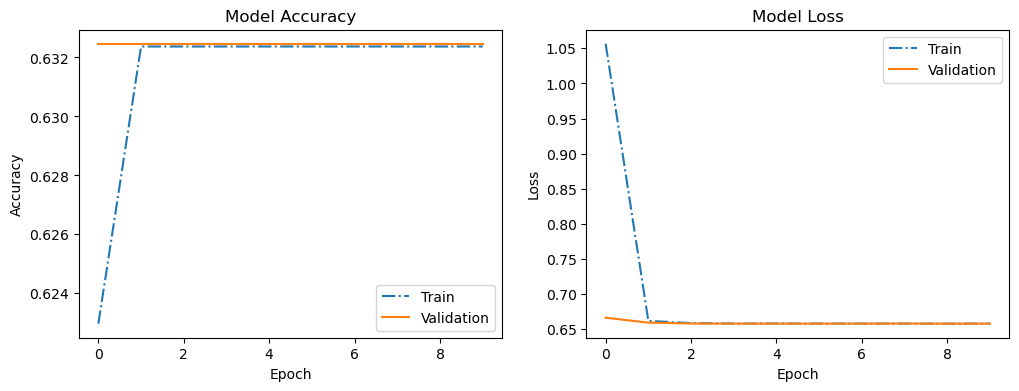

In [8]:
print(history.history)

# Corrected plotting code
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)  # Corrected subplot call
plt.plot(history.history['accuracy'], linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Corrected subplot call
plt.plot(history.history['loss'], linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [7]:
test_generator = test_datagen.flow_from_directory(
    './dataset/test/',  # Make sure you have a separate test dataset directory
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Keep data in order
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')


Found 7484 images belonging to 2 classes.
234/234 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - accuracy: 0.1315 - loss: 0.9328
Test accuracy: 0.46272048354148865, Test loss: 0.750731348991394
